# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Part IX: Portfolio Optimization with Risk Factors and Principal Components Regression (PCR)

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'AGN', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

/Users/danycajas/anaconda3/envs/github_riskfolio/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  30 of 30 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6780%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3799%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1376%,-1.1978%,-1.0086%,-1.0874%
2016-01-11,0.6043%,0.1480%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios with PCR

### 2.1 Estimating the loadings matrix with PCR.

This part is just to visualize how Riskfolio-Lib calculates a loadings matrix using PCR.

In [3]:
import riskfolio.ParamsEstimation as pe

feature_selection = 'PCR' # Method to select best model, could be PCR or Stepwise
n_components = 0.95 # 95% of explained variance. See PCA in scikit learn for more information

loadings = pe.loadings_matrix(X=X, Y=Y, feature_selection=feature_selection,
                              n_components=n_components)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
AGN,-0.0007,0.1026,0.2446,0.1839,-0.2580,0.4906
APA,-0.0006,-0.6192,0.3867,1.0815,-1.1446,1.4586
BAX,0.0003,0.3086,0.1873,0.0778,0.5212,-0.0462
BMY,-0.0003,0.0722,0.1551,0.2642,0.3006,0.1036
CMCSA,0.0001,0.0839,0.1754,0.2745,0.2770,0.1439
CNP,0.0001,-0.2179,-0.0567,0.5713,1.1100,-0.4864
CPB,-0.0003,-0.2112,-0.0894,0.5309,1.1786,-0.5765
DE,0.0005,0.0734,0.3330,0.3330,-0.3679,0.7057
DHR,0.0007,0.4074,0.1571,-0.0081,0.8048,-0.2687
HPQ,0.0002,0.1781,0.3999,0.2718,-0.4664,0.8170


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov)

feature_selection = 'PCR' # Method to select best model, could be PCR or Stepwise
n_components = 0.95 # 95% of explained variance. See PCA in scikit learn for more information

port.factors = X
port.factors_stats(method_mu=method_mu,
                   method_cov=method_cov,
                   feature_selection=feature_selection,
                   n_components=n_components
                  )

# Estimate optimal portfolio:

model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,0.0000%,10.0206%,0.0000%,0.0000%,9.4484%,0.0000%,4.4968%,11.5248%,0.0000%,...,13.1938%,0.0000%,9.4230%,0.0000%,0.0000%,0.0000%,4.9693%,0.0000%,5.0478%,0.0000%


### 2.3 Plotting portfolio composition

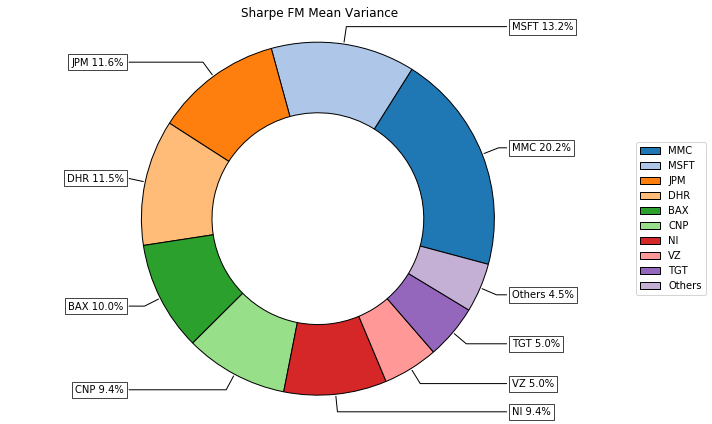

In [5]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,3.1735%,0.0000%,1.0947%,3.0491%,3.4471%,10.4405%,6.0677%,0.0000%,0.0119%,0.0000%,...,0.0000%,0.0000%,13.4296%,0.0000%,13.0923%,1.4675%,3.3780%,0.0000%,13.3326%,2.5228%
1,0.0000%,0.0000%,6.6571%,0.0000%,2.7971%,12.5022%,3.1809%,1.8149%,4.6163%,0.0000%,...,0.0000%,0.0000%,14.9095%,0.0000%,4.7720%,0.0000%,4.6292%,0.0000%,12.9647%,2.4606%
2,0.0000%,0.0000%,7.9015%,0.0000%,1.9477%,12.8660%,1.8575%,2.4812%,6.1444%,0.0000%,...,2.4346%,0.0000%,15.0662%,0.0000%,1.0595%,0.0000%,4.8736%,0.0000%,12.3357%,1.8888%
3,0.0000%,0.0000%,8.7732%,0.0000%,0.5629%,12.4072%,0.0000%,3.1302%,7.7314%,0.0000%,...,5.5864%,0.0000%,14.1048%,0.0000%,0.0000%,0.0000%,4.9972%,0.0000%,10.7737%,1.2180%
4,0.0000%,0.0000%,9.3728%,0.0000%,0.0000%,11.1168%,0.0000%,3.8015%,9.4340%,0.0000%,...,9.0455%,0.0000%,12.0148%,0.0000%,0.0000%,0.0000%,5.0122%,0.0000%,8.2545%,0.4322%


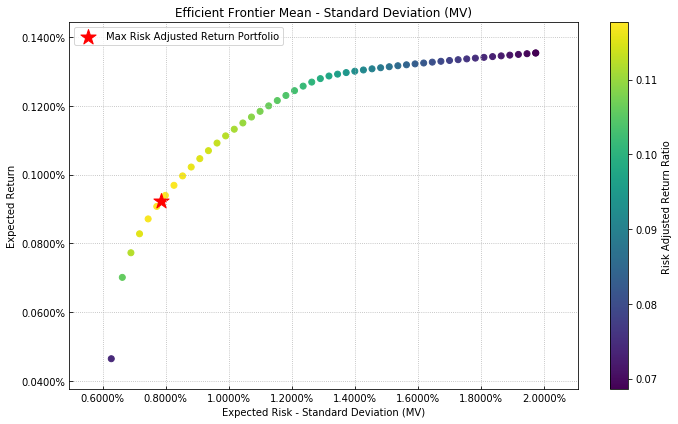

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

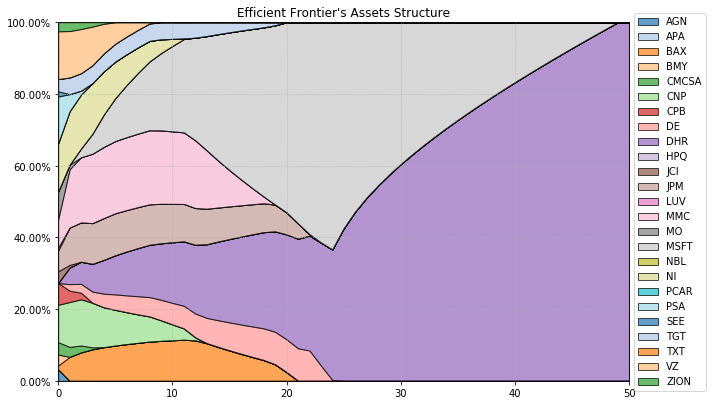

In [8]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Portfolios Using Risk Factors with Other Risk Measures and PCR

In this part I will calculate optimal portfolios for several risk measures using a __mean estimate based on PCR__. I will find the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculate Optimal Portfolios for Several Risk Measures.

I will mantain the constraints on risk factors.

In [9]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [10]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
AGN,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,10.02%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,9.45%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,4.50%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,11.52%,96.66%,100.00%,97.81%,100.00%,100.00%,100.00%,100.00%,98.23%,100.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


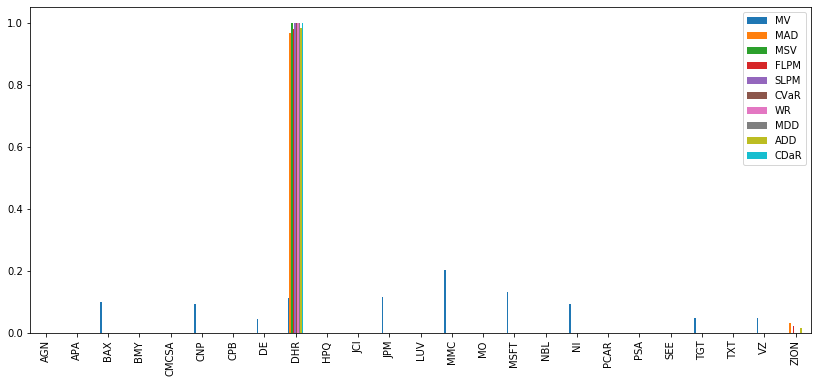

In [11]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [12]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = True

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [13]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
AGN,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,8.79%,3.66%,11.74%,1.14%,0.00%,0.00%,0.00%,0.00%,0.56%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.90%,4.57%,8.67%,6.67%,7.45%,12.83%,0.00%,27.32%,12.54%,28.29%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,14.34%,0.00%,0.00%,0.00%
DE,4.36%,1.54%,6.79%,0.37%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,11.86%,41.38%,7.30%,45.95%,55.30%,63.50%,15.28%,72.68%,22.49%,49.46%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


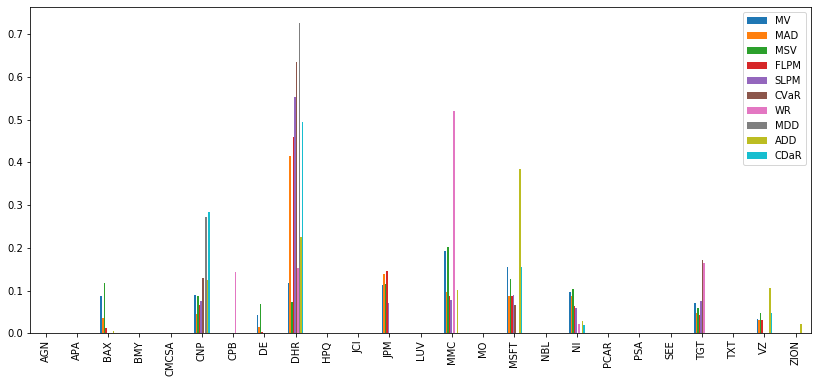

In [14]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)